In [294]:
import warnings
warnings.filterwarnings('ignore')

### 1. Regularization

In [295]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as seabornInstance

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [296]:
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [297]:
df.head(3)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A


In [298]:
df.shape

(322, 21)

In [299]:
#df.dtypes

#### Eliminate all columns whose data types are not "int64"

In [300]:
for col in df.columns:
    if df.dtypes[col]==np.object:
        df = df.drop(col,axis=1)

In [301]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


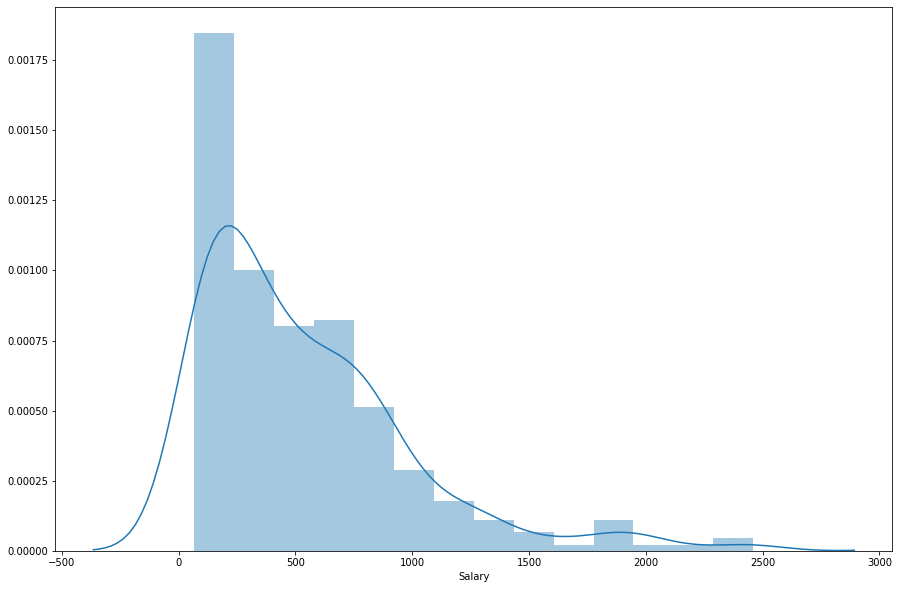

In [302]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df["Salary"])

In [303]:
df.isnull().any()

AtBat      False
Hits       False
HmRun      False
Runs       False
RBI        False
Walks      False
Years      False
CAtBat     False
CHits      False
CHmRun     False
CRuns      False
CRBI       False
CWalks     False
PutOuts    False
Assists    False
Errors     False
Salary      True
dtype: bool

In [304]:
np.sum(df["Salary"].isnull())

59

In [305]:
df = df.dropna(axis=0)

#### Linear Regression

In [306]:
X = df.drop(["Salary"],axis=1).values #convert to arrays
y = df['Salary'].values

In [307]:
len(train_test_split(X, y, test_size=0.2, random_state=0))

4

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [309]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [310]:
cols = list(df.columns)
cols.remove("Salary")

In [311]:
coeff_df = pd.DataFrame(regressor.coef_, index = cols, columns=['Coefficient'])  
coeff_df.head()

,Coefficient
AtBat,-2.015452
Hits,7.520141
HmRun,9.312551
Runs,-1.719625
RBI,-2.340944


In [312]:
y_pred = regressor.predict(X_test)

In [313]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_1 = compare.head(25)

#### visualize the error of regression / bar plot paradigm

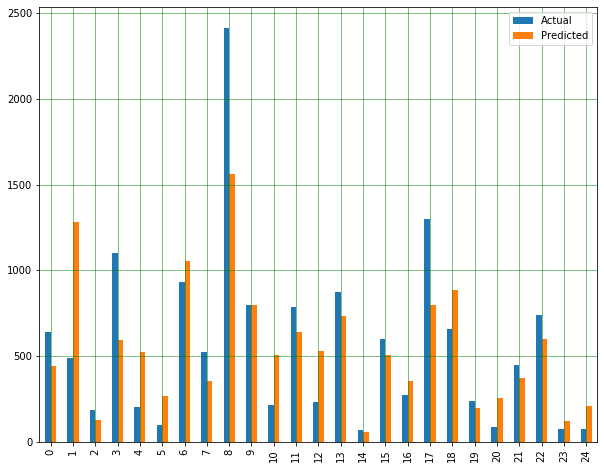

In [314]:
compare_1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 1.1 Lasso

In [315]:
from sklearn.linear_model import Lasso

In [316]:
yy = []; xx = [];
for alpha in np.arange(0, 40, 0.5).tolist():
    xx.append(round(alpha,2))
    Lasso_reg = Lasso(round(alpha,2))
    Lasso_reg.fit(X,y) #X,y are defined above
    yy.append(Lasso_reg.coef_)

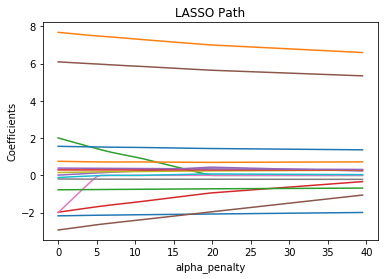

In [317]:
plt.plot(xx, yy)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dotted')
plt.xlabel('alpha_penalty')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

### Use Cross-Validation to find the optimal $\lambda$

How many predictors are left?

In [318]:
alpha_cv=[]; accuracy_cv=[]; n_feature=[];
for alpha in range(0, 1000, 2):
    alpha_cv.append(alpha)
    Lasso_cv = Lasso(alpha)
    Lasso_cv.fit(X,y)
    coef = Lasso_cv.coef_
    n_feature.append(len(coef[np.abs(coef)>1]))
    scores = cross_val_score(Lasso_cv, X, y, cv=5)
    accuracy_cv.append(scores.mean())

In [319]:
ix = accuracy_cv.index(max(accuracy_cv))
print("Through cross-validation, the optimal penalty parameter, alpha={a}, when there are {n} predictors being left".format(a=alpha_cv[ix],n=n_feature[ix]))
print("The accuracy is {acc}".format(acc=accuracy_cv[ix]))

Through cross-validation, the optimal penalty parameter, alpha=170, when there are 4 predictors being left
The accuracy is 0.3739130332052089


## 1.2 Ridge

In [320]:
from sklearn.linear_model import Ridge

In [321]:
yy = []; xx = [];
for alpha in np.arange(0, 2000, 5).tolist():
    xx.append(round(alpha,2))
    Ridge_reg = Ridge(round(alpha,2))
    Ridge_reg.fit(X,y) #X,y are defined above
    yy.append(Ridge_reg.coef_)

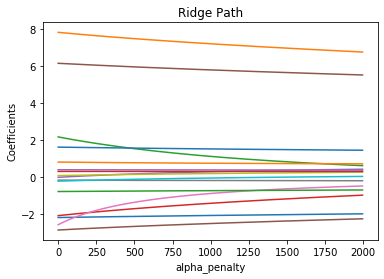

In [322]:
plt.plot(xx, yy)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dotted')
plt.xlabel('alpha_penalty')
plt.ylabel('Coefficients')
plt.title('Ridge Path')
plt.axis('tight')
plt.show()

### Use Cross-Validation to find the optimal $\lambda$

In [323]:
alpha_cv=[]; accuracy_cv=[]; n_feature=[];
for alpha in range(0, 3000, 2):
    alpha_cv.append(alpha)
    Ridge_cv = Ridge(alpha)
    Ridge_cv.fit(X,y)
    coef = Ridge_cv.coef_
    n_feature.append(len(coef[np.abs(coef)>1]))
    scores = cross_val_score(Ridge_cv, X, y, cv=5)
    accuracy_cv.append(scores.mean())

In [324]:
ix = accuracy_cv.index(max(accuracy_cv))
print("Through cross-validation, the optimal penalty parameter, alpha={a}, when there are {n} predictors being left".format(a=alpha_cv[ix],n=n_feature[ix]))
print("The accuracy is {acc}".format(acc=accuracy_cv[ix]))

Through cross-validation, the optimal penalty parameter, alpha=2998, when there are 5 predictors being left
The accuracy is 0.3645123330012089


## 2. Short Answer: bias-variance trade-off

Both Lasso and Ridge are diminishing dimensions by adding a penalty item to the optimizer (Lasso: L1; Ridge: L2).

There's a bias-variance trade-off existing in both of their processes. The bias reaches higher(accuracy goes down) along with less predictors by highlightening penalty.